In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('Flipkart_Amazon Mobile Reviews.csv')
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [33]:
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [34]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [35]:
df.shape  #there are total 21996 rows and 4 columns.
len(df['Review-Title'].value_counts())

15040

In [36]:
len(df['Product Name'].value_counts()) #There are 8 total products.

8

In [37]:
df['rating'].value_counts()

5.0 out of 5 stars    9399
1.0 out of 5 stars    5231
4.0 out of 5 stars    4886
3.0 out of 5 stars    2703
2.0 out of 5 stars    1558
Name: rating, dtype: int64

In [38]:
int(df['rating'][0][0])

1

In [39]:
#Creating a function to extract integer value of rating , from the ratings column.
def R5(str):
  for i in range(len(df)):
      return int(str[0])

In [40]:
#Applying the extraction method to extract integer from a string.
df['R5'] = df['rating'].apply(R5)


In [41]:
x=df.groupby('Product Name')['R5'].mean().sort_values(ascending=True)
x = x.reset_index()
x

,Product Name,R5
0,Samsung Galaxy M32,3.184328
1,Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,3.277070
2,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor...",3.303598
3,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",3.321353
4,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",3.400897
5,"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 G...",3.664820
6,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",3.727021
7,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.760224


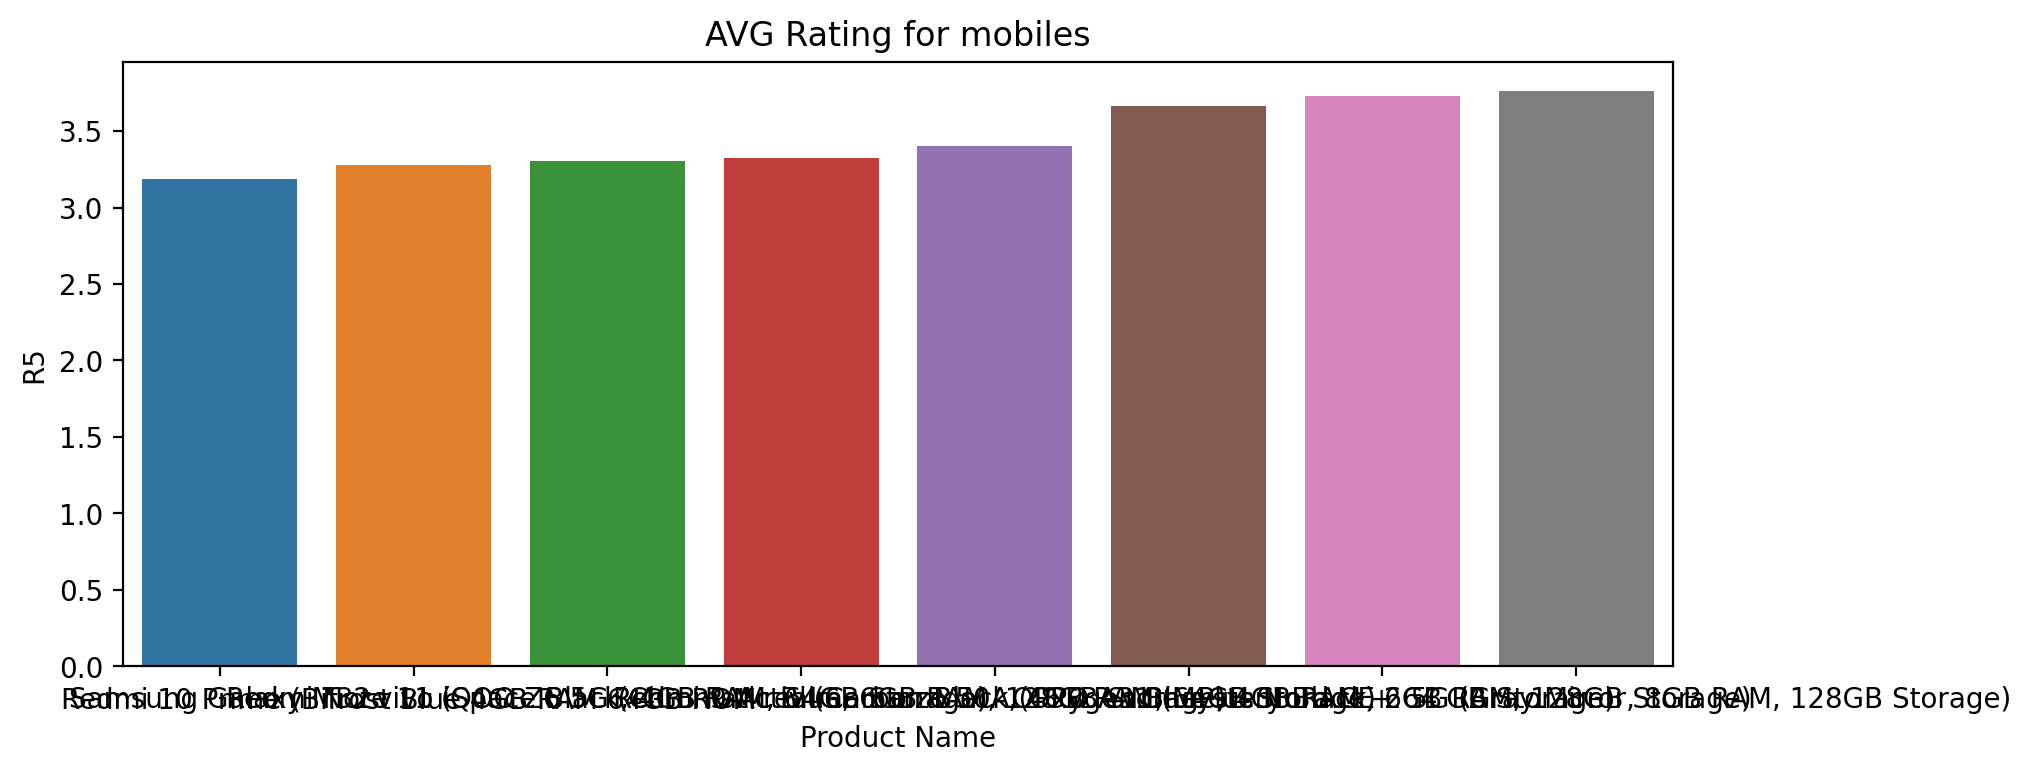

In [42]:
plt.figure(figsize=(10,4),dpi=200)
plt.title('AVG Rating for mobiles')
plt.xlabel('Mobile names')
plt.ylabel('Rating')
sns.barplot(data=x,x='Product Name',y='R5');

In [43]:
df[df['Product Name'] == 'Samsung Galaxy M32']['Review-Body']

21018    Dont buy this it is not worth for money. It is...
21019    Pros:-1. Display (Best display you can get at ...
21020    Cons:1.Good phone at this price.2.Display Qual...
21021    I am sure there will be many reviewers who wil...
21022    I purchased this phone on 16999 from Amazon by...
                               ...                        
22353                                 Battery life is good
22354     Good for lower budget & non Chinese mobile brand
22355    It's a nice productSmooth touchCamera quality ...
22356    My mobile after purchase of 3.5 months is now ...
22357     Bakwas ... total waistage of money.. use to hang
Name: Review-Body, Length: 1340, dtype: object

In [44]:
df.head()

,Review-Title,rating,Review-Body,Product Name,R5
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1


In [45]:
df['sentiment'] = df['R5'].apply(lambda score: "positive" if score >= 3 else "negative")
df['sentiment'] = df['sentiment'].map({'positive':1,'negative':0})

In [46]:
df.head()

,Review-Title,rating,Review-Body,Product Name,R5,sentiment
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,0
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,0
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,1
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,1
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,0


In [47]:
df = df[['Review-Body','Product Name','sentiment']]
df.head()

,Review-Body,Product Name,sentiment
0,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0
1,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0
2,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1
3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1
4,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0


In [58]:
df['Product Name'].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4460
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              4330
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3768
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3570
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2724
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      2166
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1419
Samsung Galaxy M32                                            1340
Name: Product Name, dtype: int64

#@ Finding the percentage of positive words and negative words ,for each mobile model.

In [54]:
p1 = (len(df[(df['Product Name'] == 'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)') & 
             (df['sentiment'] == 1)])/len(df[df['Product Name'] == 'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)']))*100

70.2914798206278

In [69]:
x['Product Name'][0]

'Samsung Galaxy M32'

In [74]:
for i in range(len(x)):
  print('positive review percentage of ',x['Product Name'][i],'is\n',round((len(df[(df['Product Name'] == x['Product Name'][i]) & 
             (df['sentiment'] == 1)])/len(df[df['Product Name'] == x['Product Name'][i]]))*100,2))

positive review percentage of  Samsung Galaxy M32 is
 63.51
positive review percentage of  Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM  is
 64.89
positive review percentage of  Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage) is
 68.21
positive review percentage of  vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage) is
 68.22
positive review percentage of  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) is
 70.29
positive review percentage of  realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage) is
 76.22
positive review percentage of  OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage) is
 76.19
positive review percentage of  OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage) is
 77.9


In [75]:
for i in range(len(x)):
  print('Negative review percentage of ',x['Product Name'][i],'is\n',round((len(df[(df['Product Name'] == x['Product Name'][i]) & 
             (df['sentiment'] == 0)])/len(df[df['Product Name'] == x['Product Name'][i]]))*100,2))

Negative review percentage of  Samsung Galaxy M32 is
 36.49
Negative review percentage of  Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM  is
 35.11
Negative review percentage of  Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage) is
 31.79
Negative review percentage of  vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage) is
 31.78
Negative review percentage of  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) is
 29.71
Negative review percentage of  realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage) is
 23.78
Negative review percentage of  OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage) is
 23.81
Negative review percentage of  OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage) is
 22.1
